<!-- Loading Packages -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<!-- Read Data -->

In [2]:
train=pd.read_csv('Train.csv')

In [3]:
test=pd.read_csv('Test.csv')


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
train_original=train.copy()
test_original=test.copy()

In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [9]:
train['source']='train'
test['Item_Outlet_Sales']='0'
data=pd.concat([train,test], sort=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [10]:
data['Item_Outlet_Sales'].describe()

count     14204
unique     3494
top           0
freq       5681
Name: Item_Outlet_Sales, dtype: object

C:\Users\Uday\AppData\Local\Temp\ipykernel_9628\3417026357.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

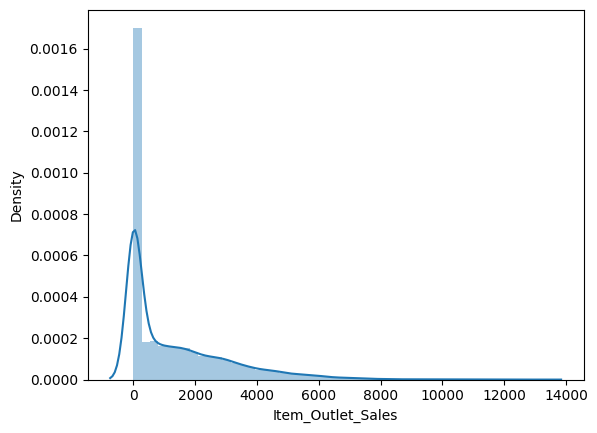

In [11]:
sns.distplot(data['Item_Outlet_Sales'])

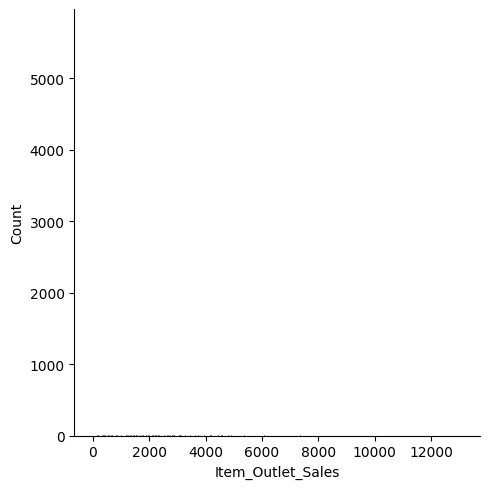

In [12]:
sns.displot(data['Item_Outlet_Sales'])

In [13]:
categorical_features = data.select_dtypes(include = ['object']).dtypes.index
categorical_features

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'source'],
      dtype='object')

In [14]:
Numerical_features= data.select_dtypes(include=['number']).dtypes.index
Numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [15]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot: >

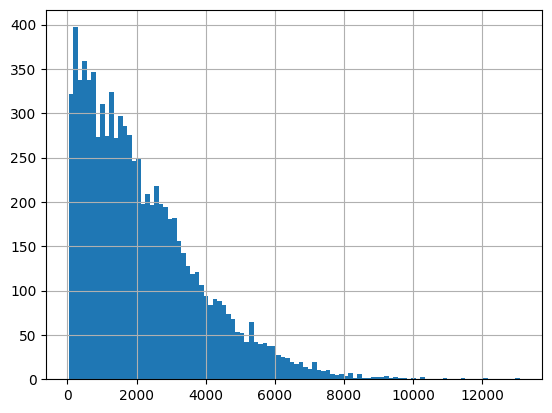

In [16]:
train['Item_Outlet_Sales'].hist(bins=100)

<AxesSubplot: >

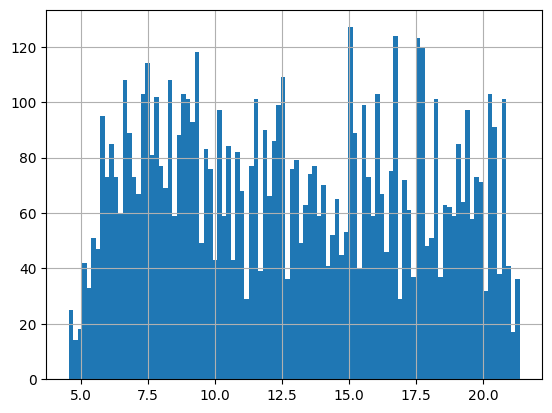

In [17]:
train['Item_Weight'].hist(bins=100)

<AxesSubplot: >

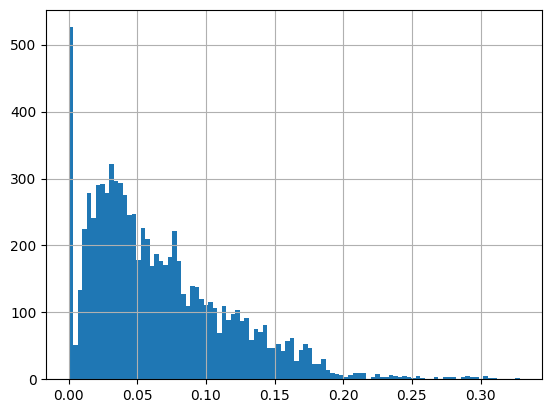

In [18]:
train['Item_Visibility'].hist(bins=100)

<AxesSubplot: >

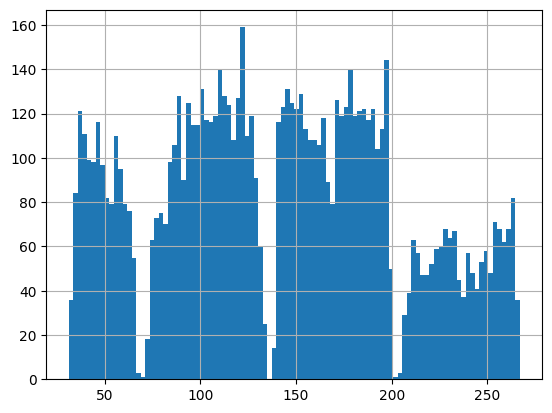

In [19]:
train['Item_MRP'].hist(bins=100)

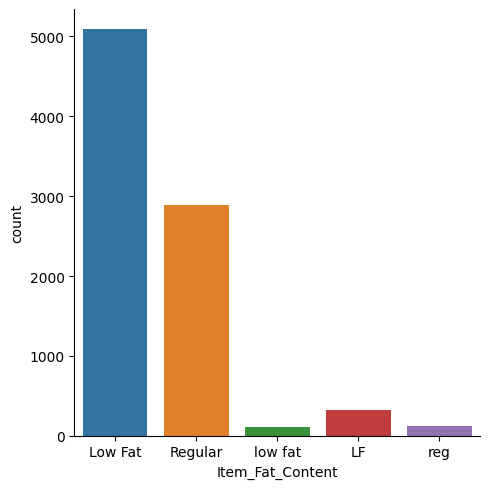

In [20]:
sns.catplot(x="Item_Fat_Content", kind="count",data=train)

In [21]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

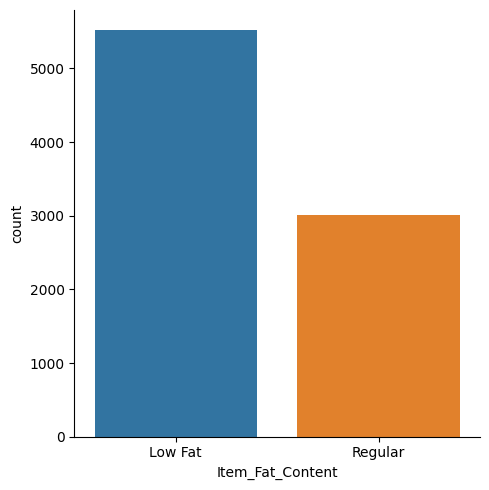

In [22]:
sns.catplot(x='Item_Fat_Content',kind = 'count', data = train)

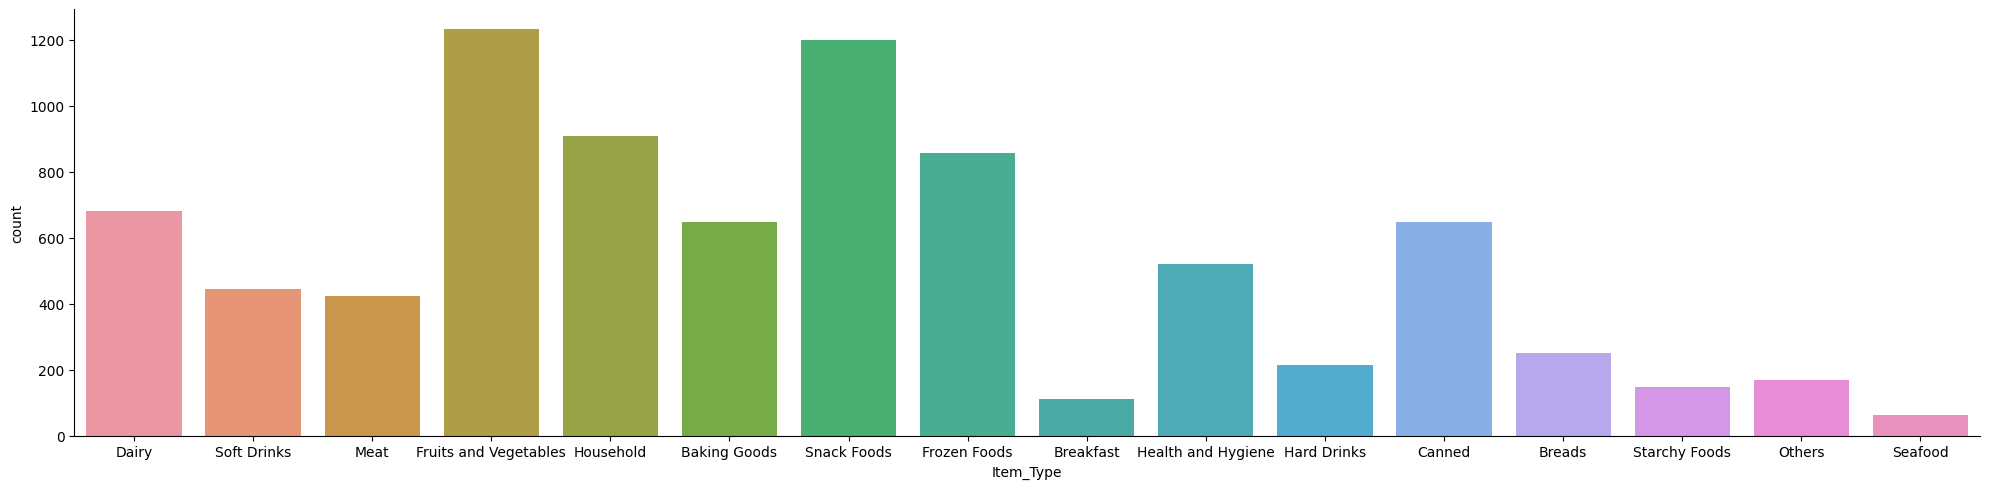

In [23]:
sns.catplot(x='Item_Type',kind = 'count',data = train,aspect =4)

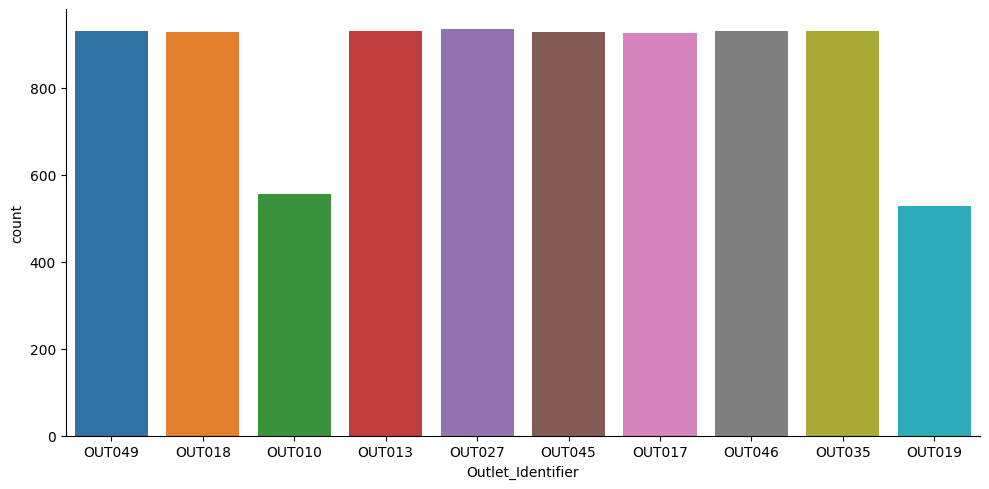

In [24]:
sns.catplot(x='Outlet_Identifier',kind = 'count',data = train,aspect = 2)

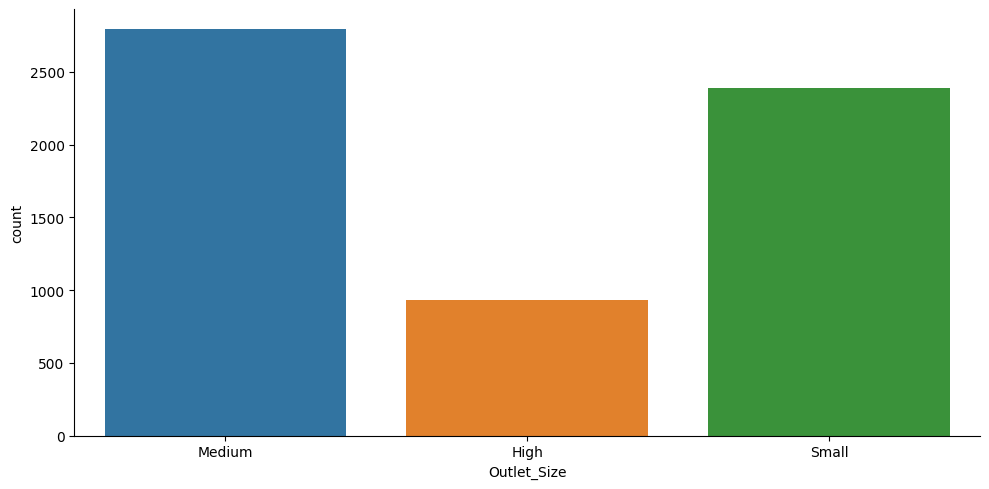

In [25]:
sns.catplot(x='Outlet_Size',kind = 'count',data = train,aspect = 2)


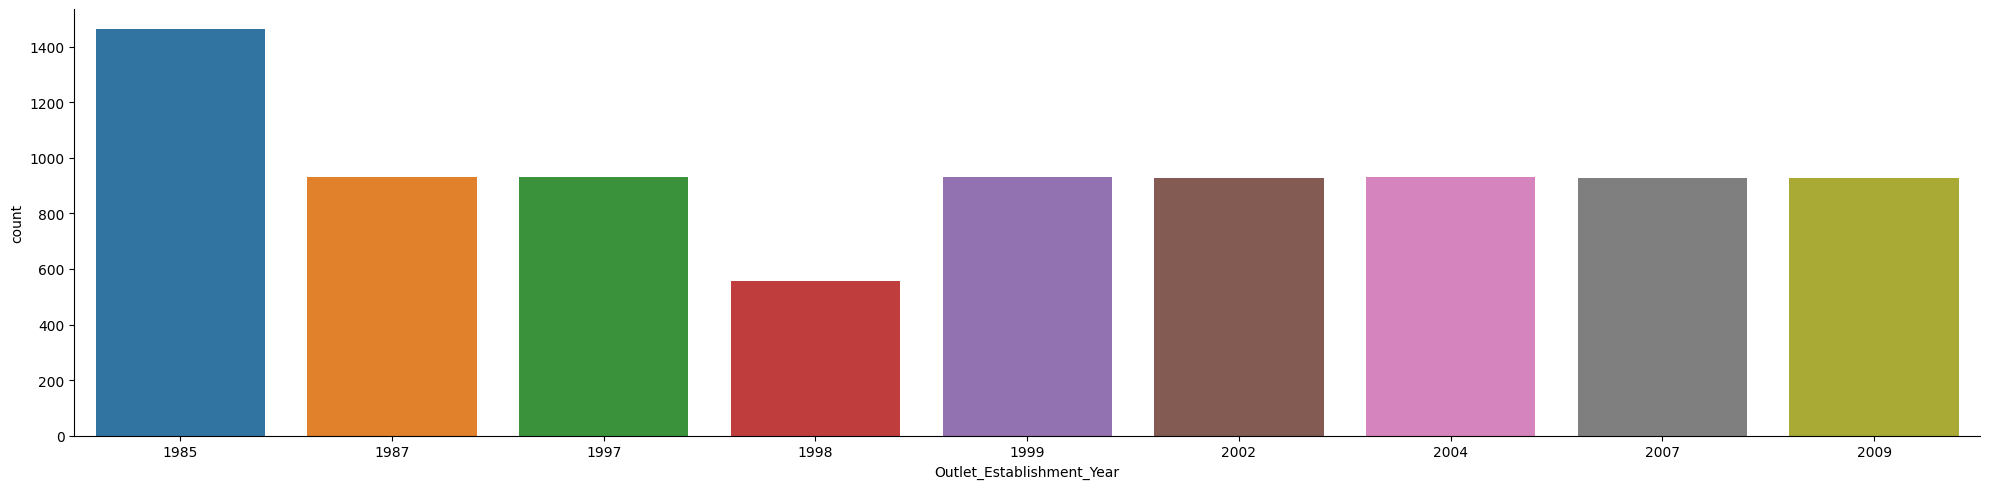

In [26]:
sns.catplot(x='Outlet_Establishment_Year',kind = 'count',data = train,aspect =4)

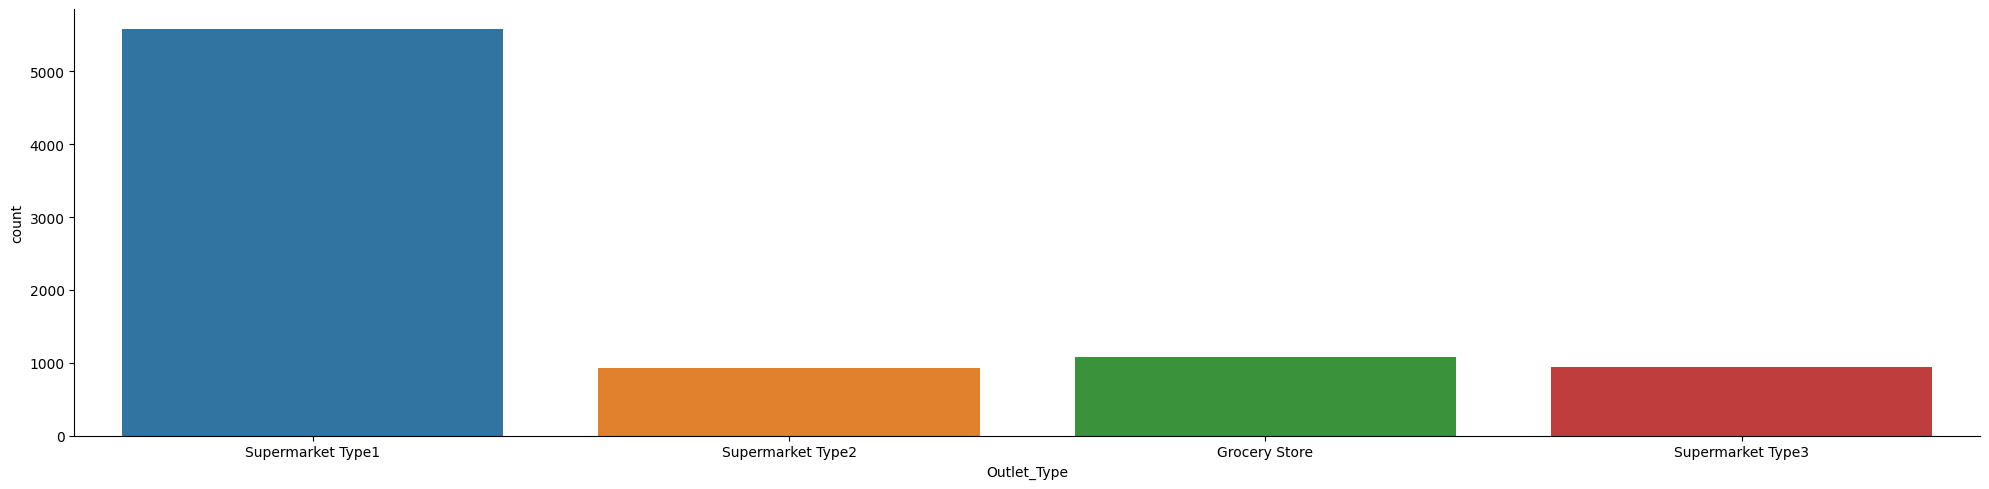

In [27]:
sns.catplot(x='Outlet_Type',kind = 'count',data = train,aspect =4)

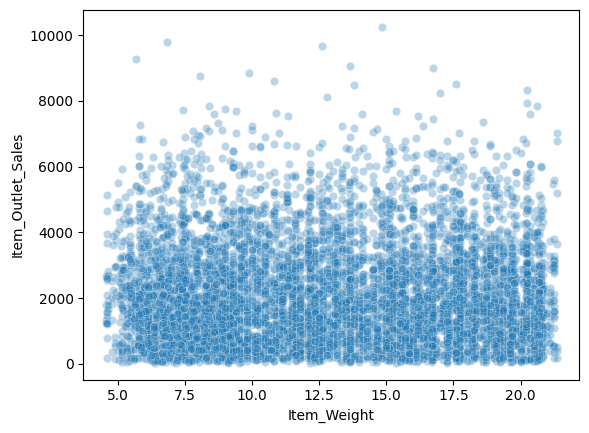

In [28]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

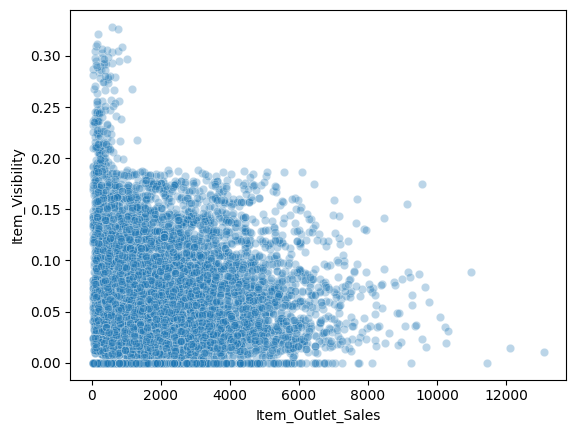

In [29]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

<AxesSubplot: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

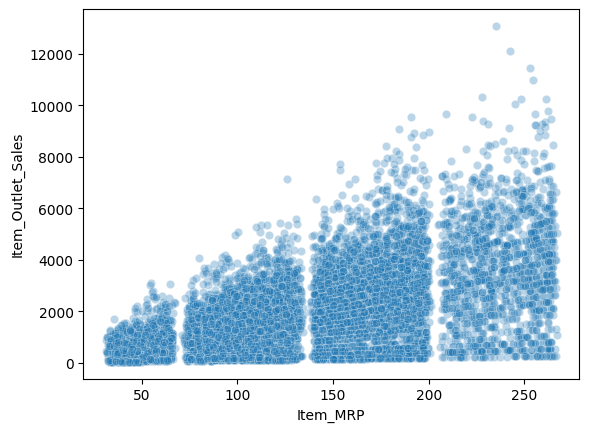

In [30]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

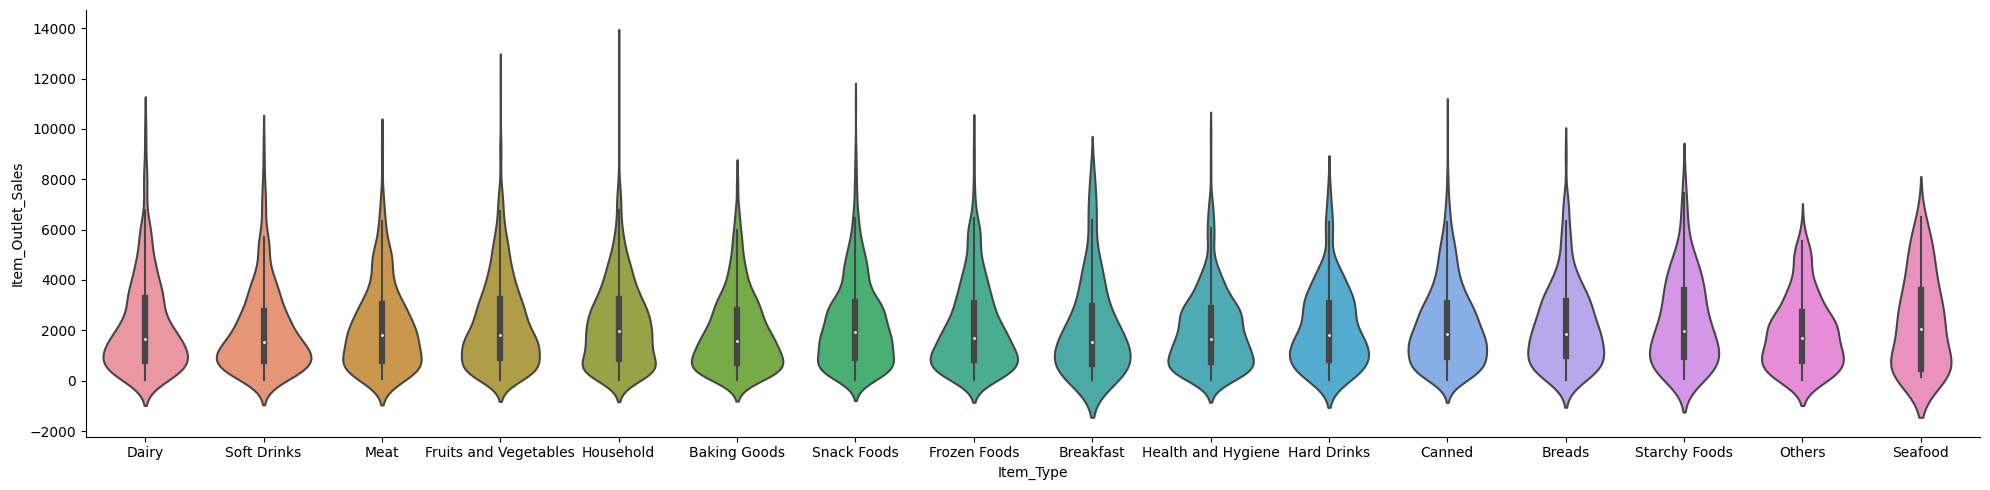

In [31]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

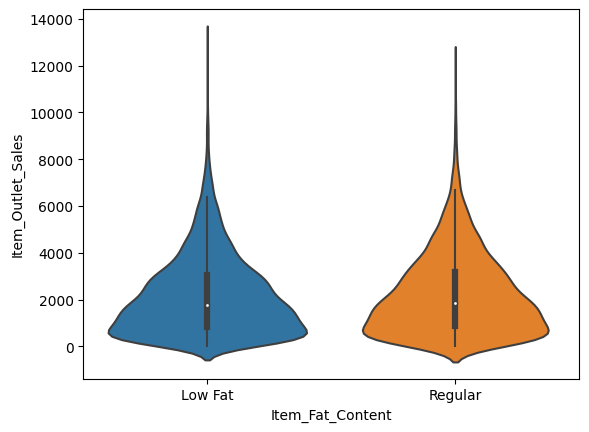

In [32]:
sns.violinplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

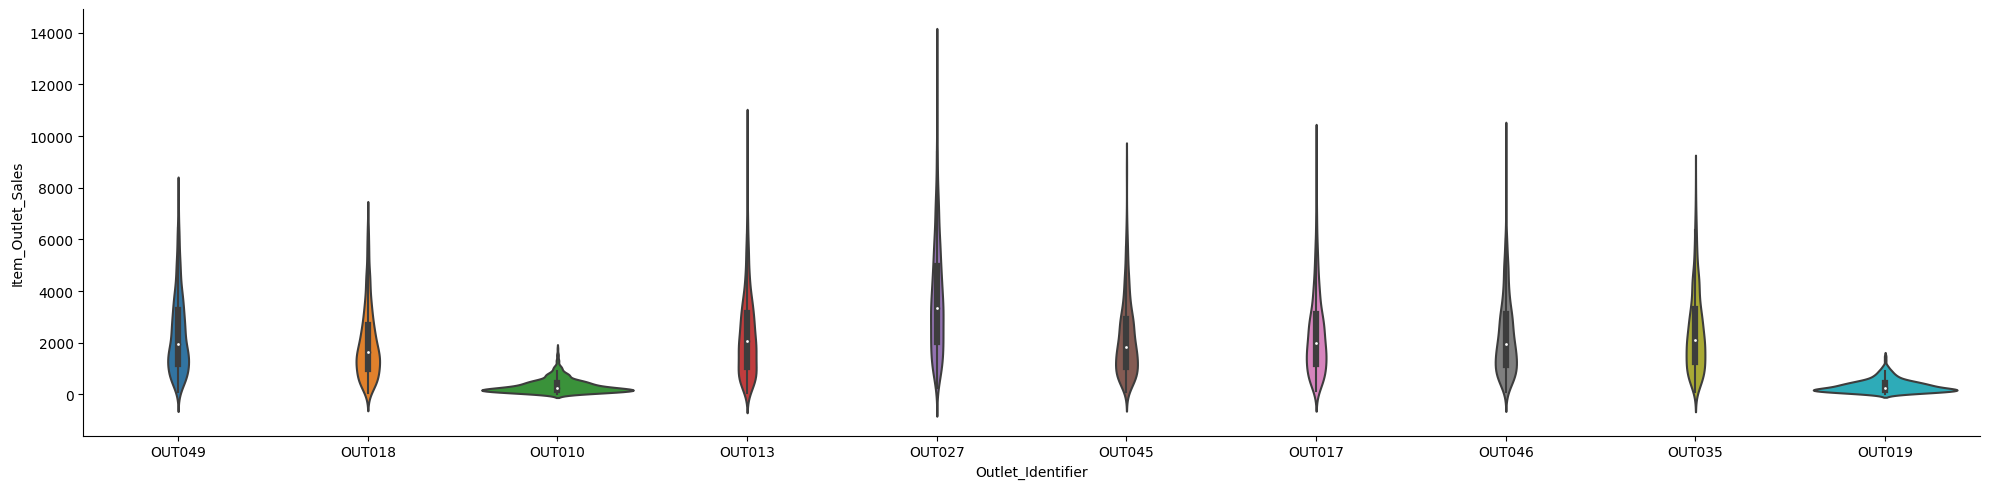

In [34]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',kind = 'violin',data = train,aspect = 4)

<AxesSubplot: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

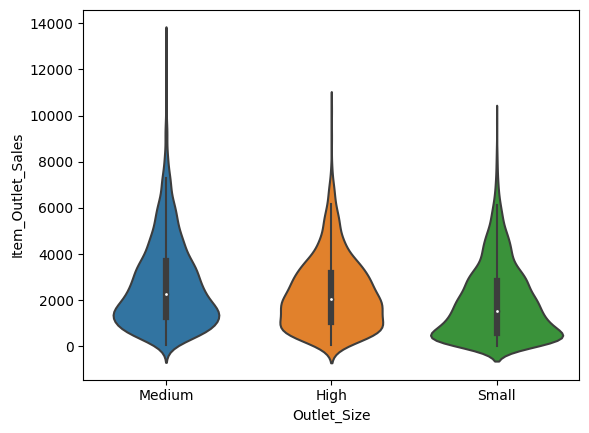

In [35]:
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data = train)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

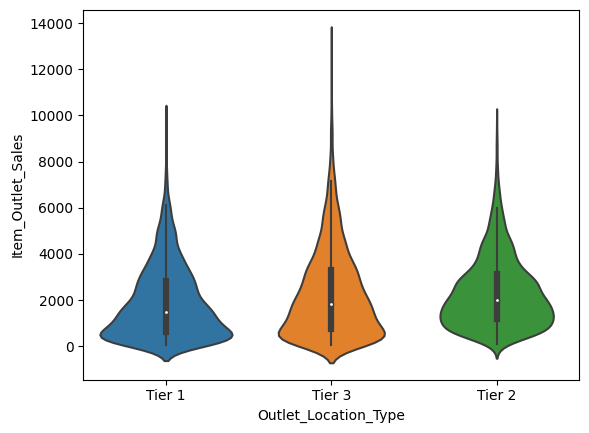

In [36]:
sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data = train)

<AxesSubplot: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

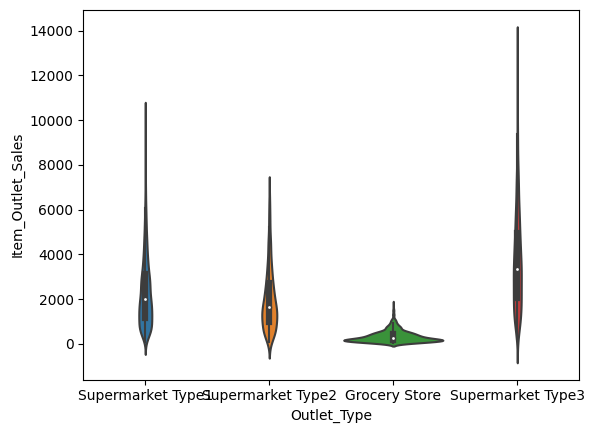

In [37]:
sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data = train)

In [38]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
l_enc=LabelEncoder()
a=l_enc.fit_transform(train['Item_Identifier'])
a

array([ 156,    8,  662, ..., 1357,  681,   50])

In [40]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [41]:
train.Item_Weight.isna().sum()

0

In [42]:
train['Outlet_Size'].fillna('Small',inplace  = True)

In [43]:
train.Outlet_Size.isna().sum()

0

<AxesSubplot: ylabel='Frequency'>

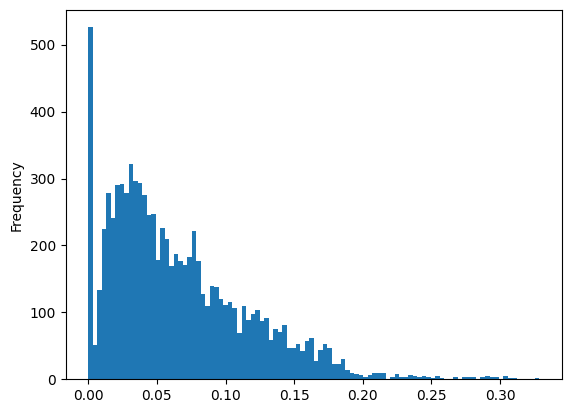

In [44]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [45]:
train.shape


(8523, 13)

In [46]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [47]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

<AxesSubplot: ylabel='Frequency'>

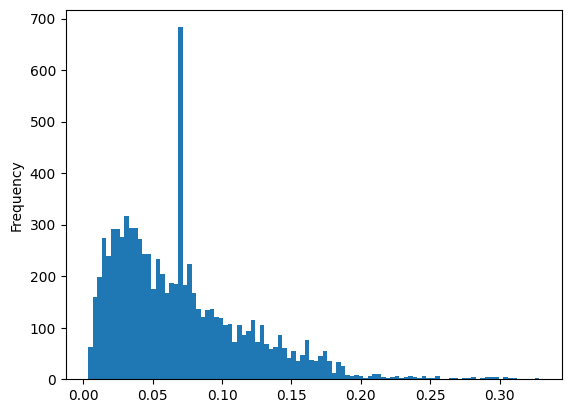

In [48]:
train['Item_Visibility'].plot(kind='hist',bins=100)

In [49]:
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

In [50]:
item_list=[]
for i in train['Item_Type']:
        if i in perishable:
            item_list.append('perishable')
        elif (i in non_perishable):
            item_list.append('non_perishable')
        else :
            item_list.append('not_shure')
train['Item_Type_New']=item_list

In [51]:
train['Outlet_Years'] = 2019-train['Outlet_Establishment_Year']

In [52]:
train['Price_Per_Unit_Weight'] = train['Item_MRP']/train['Item_Weight']

In [53]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
    
train['Item_MRP_Clusters']=train['Item_MRP'].astype(int).apply(clusters)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_New,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,perishable,20,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,non_perishable,10,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,perishable,20,8.092457,3rd
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,perishable,21,9.484115,3rd
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,non_perishable,32,6.031512,1st


In [54]:
train['Item_MRP_Clusters'].unique()


array(['4th', '1st', '3rd', '2nd'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()
train['Outlet_Size']=le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP']=le.fit_transform(train['Item_MRP'])
train['Item_MRP_Clusters']=le.fit_transform(train['Item_MRP_Clusters'])

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   int64  
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
 13  Item_Type_New              8523 non-null   objec

In [58]:
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_New']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_New','source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [59]:
train['Price_Per_Unit_Weight'] = np.log(train['Price_Per_Unit_Weight'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

In [60]:
corr=train.corr(numeric_only=True)

In [61]:
print(corr)

                               Item_Weight  Item_Fat_Content  Item_Visibility  \
Item_Weight                       1.000000         -0.002907         0.066080   
Item_Fat_Content                 -0.002907          1.000000         0.054917   
Item_Visibility                   0.066080          0.054917         1.000000   
Item_MRP                         -0.006846          0.006624        -0.001811   
Outlet_Establishment_Year        -0.697827          0.003151        -0.051790   
...                                    ...               ...              ...   
Outlet_Type_Supermarket Type2    -0.159086          0.002129        -0.021623   
Outlet_Type_Supermarket Type3     0.771038          0.000183        -0.040640   
Item_Type_New_non_perishable     -0.016239         -0.192580        -0.042096   
Item_Type_New_not_shure           0.001699          0.025015        -0.003787   
Item_Type_New_perishable          0.015956          0.185256         0.048058   

                           

In [62]:
from sklearn.linear_model import LinearRegression
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 8)

In [65]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(6392, 1602) (2131, 1602) (6392,) (2131,)


In [66]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Years,Price_Per_Unit_Weight,Item_MRP_Clusters,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_non_perishable,Item_Type_New_not_shure,Item_Type_New_perishable
4325,13.00,0,-1.873283,1121,1997,2,0,22,1.813303,1,...,0,1,0,0,1,0,0,1,0,0
246,12.00,0,-3.382979,4137,1987,0,2,32,2.704698,2,...,0,0,0,0,1,0,0,1,0,0
22,14.60,0,-3.661337,4705,2004,2,1,15,2.599684,2,...,0,0,0,0,1,0,0,1,0,0
4612,15.50,1,-2.065209,5849,1998,2,2,21,2.828103,3,...,0,0,0,1,0,0,0,1,0,0
1894,15.35,0,-4.280608,877,1999,1,0,20,1.407514,0,...,0,0,1,0,1,0,0,1,0,0


In [67]:
model = LinearRegression(fit_intercept= True)


In [68]:
model.fit(X,y)

LinearRegression()

In [69]:
y_pred = model.predict(X_valid)

In [70]:
model.score(X_train,y_train),model.score(X_valid,y_valid)

(0.6425713410546443, 0.6452257239626547)

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [72]:
mean_squared_error(y_valid, y_pred),mean_absolute_error(y_valid, y_pred)

(1137359.5935939325, 789.2206880748475)

In [73]:
from sklearn.linear_model import Lasso


In [74]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)

C:\Users\Uday\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+09, tolerance: 1.798e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [75]:
predictions = ls.predict(X_valid)

In [76]:
mean_absolute_error(y_valid,predictions)

989.0100187150301

In [77]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS

In [79]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
RFR.fit(X_train, y_train)
y_predict = RFR.predict(X_valid)
RFR_MAE = round(MAE(y_valid, y_predict),2)
RFR_MSE = round(MSE(y_valid, y_predict),2)
RFR_R_2 = round(R2(y_valid, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")


 Mean Absolute Error: 790.46

 Mean Squared Error: 1276748.4

 R^2 Score: 0.6017



In [80]:
cross_val(RFR,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.52
0.51
0.57
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5476


In [81]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

In [82]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

In [83]:
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

Mean Absolute Error : 806.1366593103871
